File: AttackTheater
Total Labels: 274
Unique Labels: 4
Characterization
Remote         86
Local          73
Limited Rmt    66
Physical       49
Name: count, dtype: int64
--------------------------------------------------
File: Context
Total Labels: 798
Unique Labels: 7
Characterization
Application          156
Physical Hardware    129
Channel              103
Firmware             103
Guest OS             103
Host OS              102
Hypervisor           102
Name: count, dtype: int64
--------------------------------------------------
File: ImpactMethod
Total Labels: 420
Unique Labels: 5
Characterization
Authentication Bypass    102
Code Execution            88
Trust Failure             86
Man-in-the-Middle         79
Context Escape            65
Name: count, dtype: int64
--------------------------------------------------
File: LogicalImpact
Total Labels: 562
Unique Labels: 6
Characterization
Write                   134
Read                    116
Resource Removal         95
Service Inte

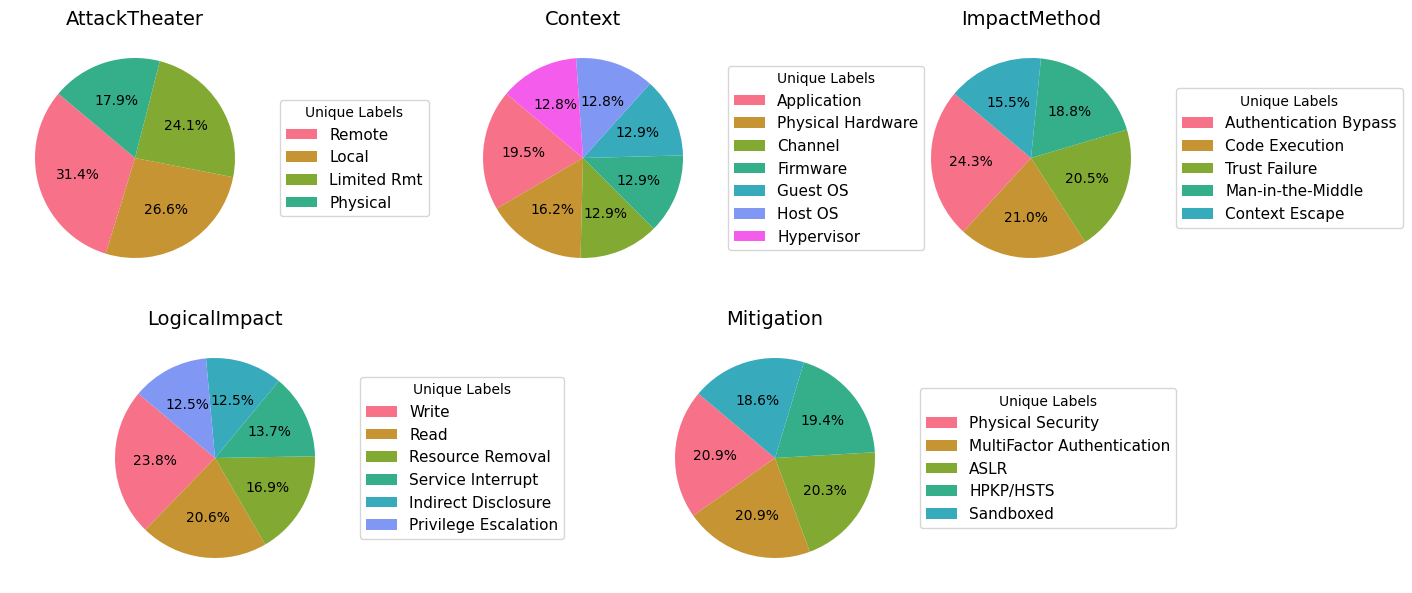

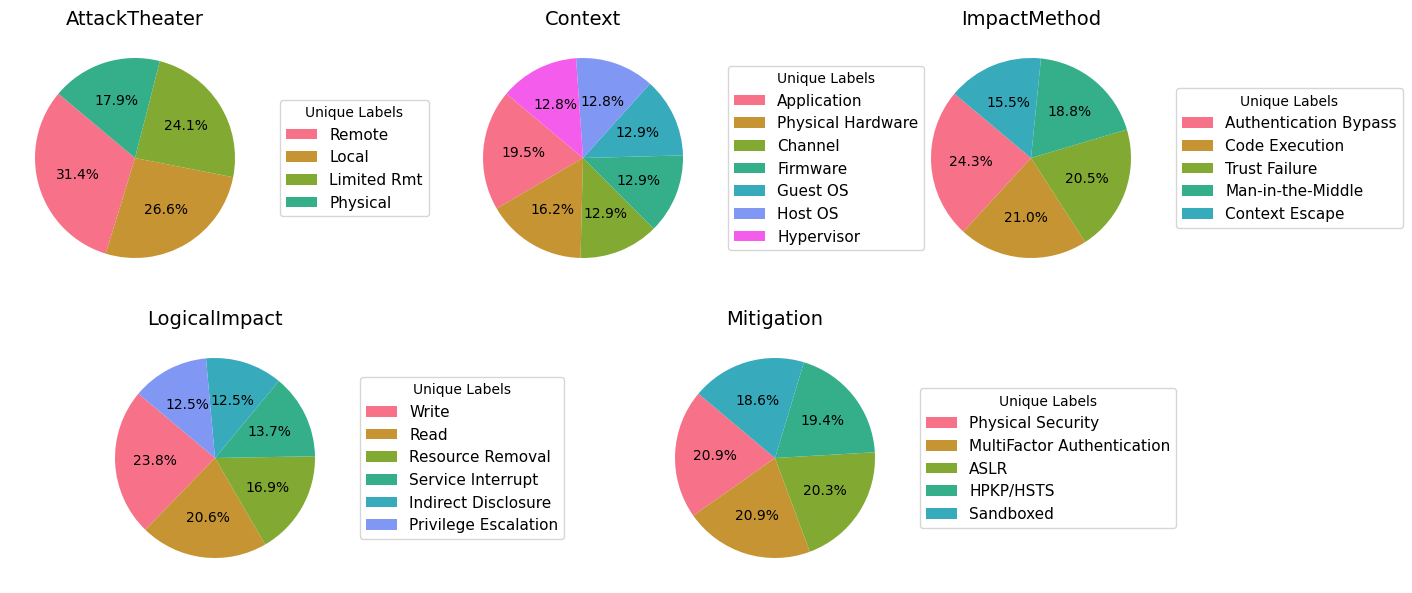

File: AttackTheater
Total Labels: 274
Unique Labels: 4
Characterization
Remote         86
Local          73
Limited Rmt    66
Physical       49
Name: count, dtype: int64
--------------------------------------------------
File: Context
Total Labels: 798
Unique Labels: 7
Characterization
Application          156
Physical Hardware    129
Channel              103
Firmware             103
Guest OS             103
Host OS              102
Hypervisor           102
Name: count, dtype: int64
--------------------------------------------------
File: ImpactMethod
Total Labels: 420
Unique Labels: 5
Characterization
Authentication Bypass    102
Code Execution            88
Trust Failure             86
Man-in-the-Middle         79
Context Escape            65
Name: count, dtype: int64
--------------------------------------------------
File: LogicalImpact
Total Labels: 562
Unique Labels: 6
Characterization
Write                   134
Read                    116
Resource Removal         95
Service Inte

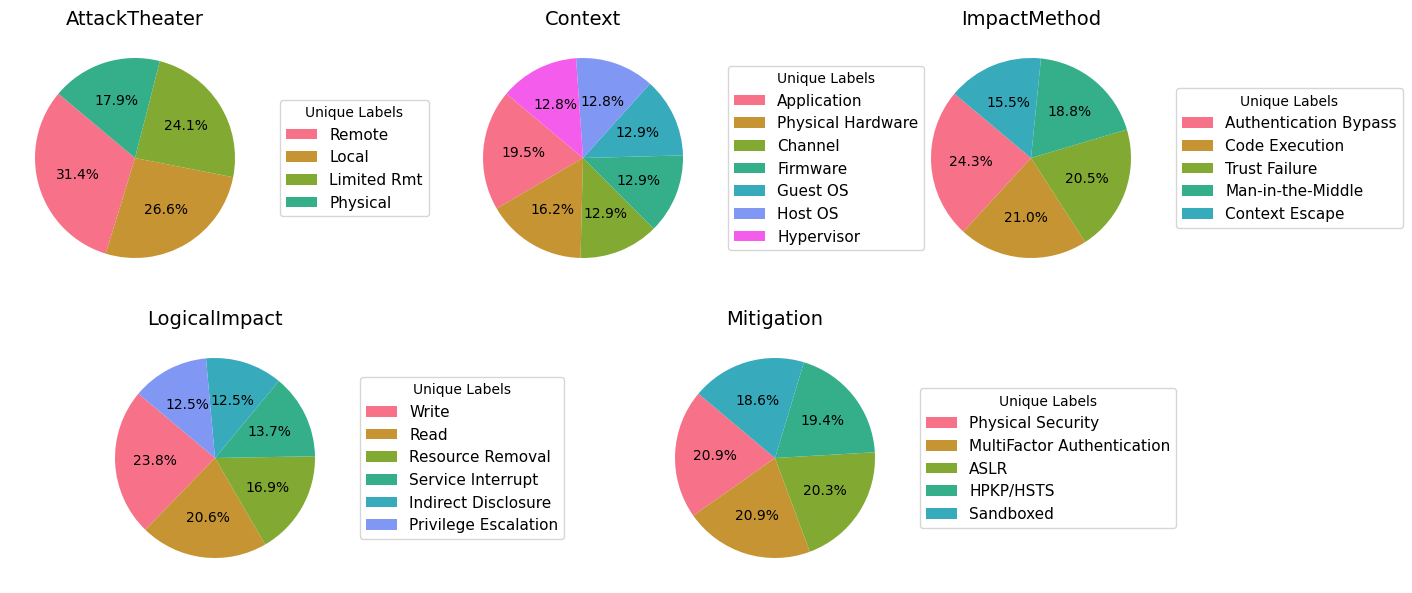

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
    return analysis_results

def plot_pie_charts(analysis_results):
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Maintain good aspect ratio
    axes = axes.flatten()

    # Use a color palette that can accommodate the maximum number of slices
    max_slices = max(len(res['label_counts']) for res in analysis_results.values())
    colors = sns.color_palette("husl", max_slices)

    # Adjust size for the top row charts
    top_row_size = 0.23  # Smaller size for top 3 charts
    bottom_row_size = 0.27  # Slightly larger size for bottom 2 charts

    # Plot each pie chart
    for i, (ax, (name, result)) in enumerate(zip(axes[:len(analysis_results)], analysis_results.items())):
        clean_name = name.replace(".csv", "")  # Remove ".csv" from the filename

        # Create pie chart
        wedges, texts, autotexts = ax.pie(
            result['label_counts'],
            labels=None,  # Remove labels from around the pie chart
            autopct='%1.1f%%',
            colors=colors[:len(result['label_counts'])],
            startangle=140,
            textprops={'fontsize': 10}  # Reduce font size for percentage labels
        )

        # Set title
        ax.set_title(f'Class Distribution for {clean_name}', fontsize=12)

        # Adjust position: Bring circles closer together horizontally, and bottom row closer to top row
        if i < 3:  # Top row (unchanged)
            ax.set_position([0.1 + (i * 0.28), 0.55, top_row_size, top_row_size])
        else:  # Bottom row moved **closer vertically** (y-position changed)
            ax.set_position([0.2 + ((i - 3) * 0.28), 0.25, bottom_row_size, bottom_row_size])

        # Move legends slightly further away
        ax.legend(
            wedges, 
            result['label_counts'].index, 
            title="Unique Labels", 
            loc="center left", 
            bbox_to_anchor=(1.05, 0.5),  # Keep legends slightly outward
            fontsize=9,  # Reduce text size for better fit
            prop={'size': 9}  # Reduce overall box size
        )

    # Hide any unused subplots (if total < 6)
    for i in range(len(analysis_results), 6):
        fig.delaxes(axes[i])

    plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis resultsimport os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
    return analysis_results

def plot_pie_charts(analysis_results):
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Maintain good aspect ratio
    axes = axes.flatten()

    # Use a color palette that can accommodate the maximum number of slices
    max_slices = max(len(res['label_counts']) for res in analysis_results.values())
    colors = sns.color_palette("husl", max_slices)

    # Adjust size for the top row charts
    top_row_size = 0.23  # Smaller size for top 3 charts
    bottom_row_size = 0.27  # Slightly larger size for bottom 2 charts

    # Plot each pie chart
    for i, (ax, (name, result)) in enumerate(zip(axes[:len(analysis_results)], analysis_results.items())):
        clean_name = name.replace(".csv", "")  # Remove ".csv" from the filename

        # Create pie chart
        wedges, texts, autotexts = ax.pie(
            result['label_counts'],
            labels=None,  # Remove labels from around the pie chart
            autopct='%1.1f%%',
            colors=colors[:len(result['label_counts'])],
            startangle=140,
            textprops={'fontsize': 10}  # Keep percentage labels readable
        )

        # Set title with larger text
        ax.set_title(f'Class Distribution for {clean_name}', fontsize=14)  # Increased title font size

        # Adjust position: Bring circles closer together horizontally, and bottom row closer to top row
        if i < 3:  # Top row (unchanged)
            ax.set_position([0.1 + (i * 0.28), 0.55, top_row_size, top_row_size])
        else:  # Bottom row moved **closer vertically** (y-position changed)
            ax.set_position([0.2 + ((i - 3) * 0.28), 0.25, bottom_row_size, bottom_row_size])

        # Move legends slightly further away & increase text size
        ax.legend(
            wedges, 
            result['label_counts'].index, 
            title="Unique Labels", 
            loc="center left", 
            bbox_to_anchor=(1.05, 0.5),  # Keep legends slightly outward
            fontsize=11,  # Increased legend text size
            prop={'size': 11}  # Increased overall box size
        )

    # Hide any unused subplots (if total < 6)
    for i in range(len(analysis_results), 6):
        fig.delaxes(axes[i])

    plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis results
for file, result in analysis_results.items():
    print(f"File: {file.replace('.csv', '')}")  # Remove ".csv" from the printed output
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
    return analysis_results

def plot_pie_charts(analysis_results):
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Maintain good aspect ratio
    axes = axes.flatten()

    # Use a color palette that can accommodate the maximum number of slices
    max_slices = max(len(res['label_counts']) for res in analysis_results.values())
    colors = sns.color_palette("husl", max_slices)

    # Adjust size for the top row charts
    top_row_size = 0.25  # Smaller size for top 3 charts
    bottom_row_size = 0.25  # Slightly larger size for bottom 2 charts

    # Plot each pie chart
    for i, (ax, (name, result)) in enumerate(zip(axes[:len(analysis_results)], analysis_results.items())):
        clean_name = name.replace(".csv", "")  # Remove ".csv" from the filename

        # Create pie chart
        wedges, texts, autotexts = ax.pie(
            result['label_counts'],
            labels=None,  # Remove labels from around the pie chart
            autopct='%1.1f%%',
            colors=colors[:len(result['label_counts'])],
            startangle=140,
            textprops={'fontsize': 10}  # Keep percentage labels readable
        )

        # Set title with larger text
        ax.set_title(f'{clean_name}', fontsize=14)  # Increased title font size

        # Adjust position: Keep top row the same, slightly spread bottom row apart horizontally
        if i < 3:  # Top row (unchanged)
            ax.set_position([0.1 + (i * 0.28), 0.55, top_row_size, top_row_size])
        else:  # Bottom row spread slightly apart horizontally
            ax.set_position([0.15 + ((i - 3) * 0.35), 0.25, bottom_row_size, bottom_row_size])

        # Move legends slightly further away & keep larger text size
        ax.legend(
            wedges, 
            result['label_counts'].index, 
            title="Unique Labels", 
            loc="center left", 
            bbox_to_anchor=(1.05, 0.5),  # Keep legends slightly outward
            fontsize=11,  # Keep legend text size large
            prop={'size': 11}  # Keep overall legend box size larger
        )

    # Hide any unused subplots (if total < 6)
    for i in range(len(analysis_results), 6):
        fig.delaxes(axes[i])

    plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis results
for file, result in analysis_results.items():
    print(f"File: {file.replace('.csv', '')}")  # Remove ".csv" from the printed output
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)

# Plot pie charts in 3x2 layout, with centered bottom row if there are 5
plot_pie_charts(analysis_results)

# Plot pie charts in 3x2 layout, with centered bottom row if there are 5
plot_pie_charts(analysis_results)

for file, result in analysis_results.items():
    print(f"File: {file.replace('.csv', '')}")  # Remove ".csv" from the printed output
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)

# Plot pie charts in 3x2 layout, with centered bottom row if there are 5
plot_pie_charts(analysis_results)



Generating Confusion Matrix Plots:

Model: gpt-4o | Noun Group: Context


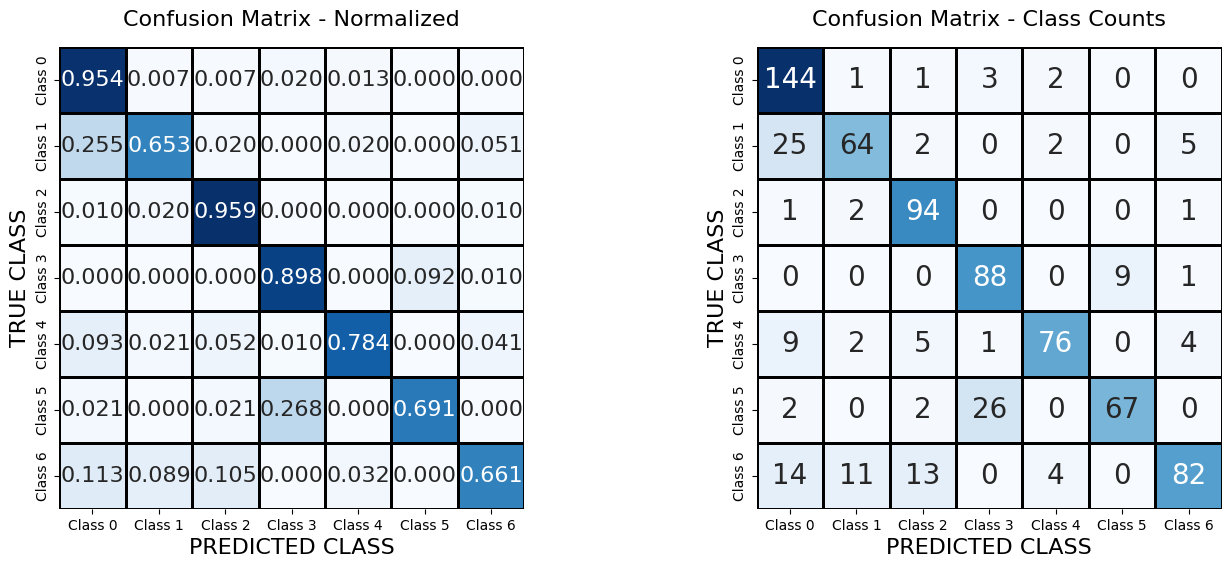

Model: gpt-4o | Noun Group: ImpactMethod


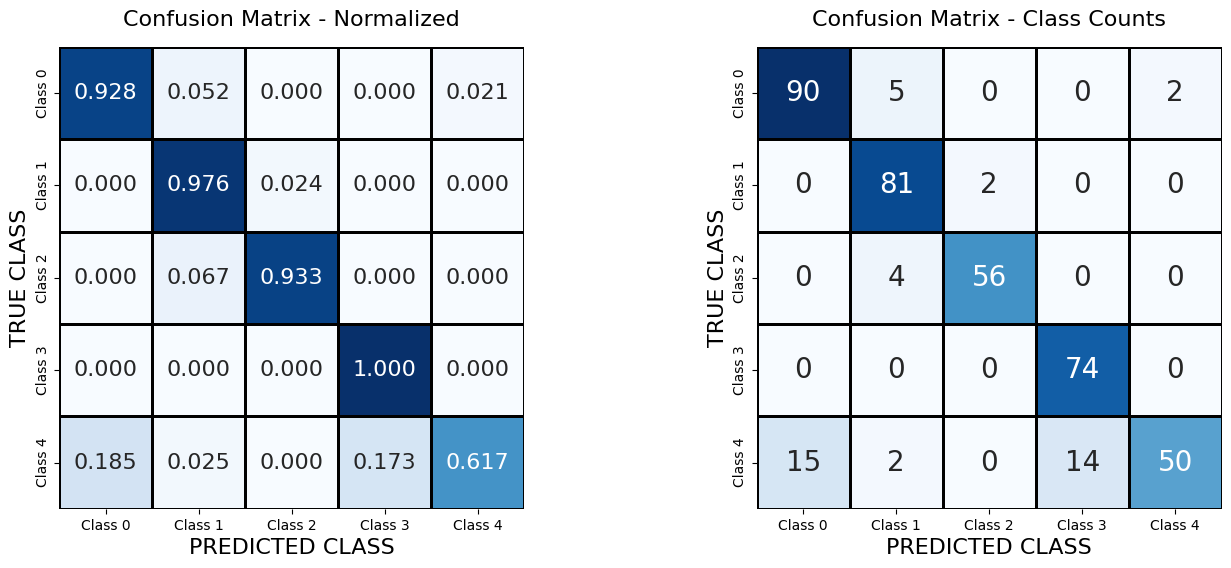

Model: gpt-4o | Noun Group: AttackTheater


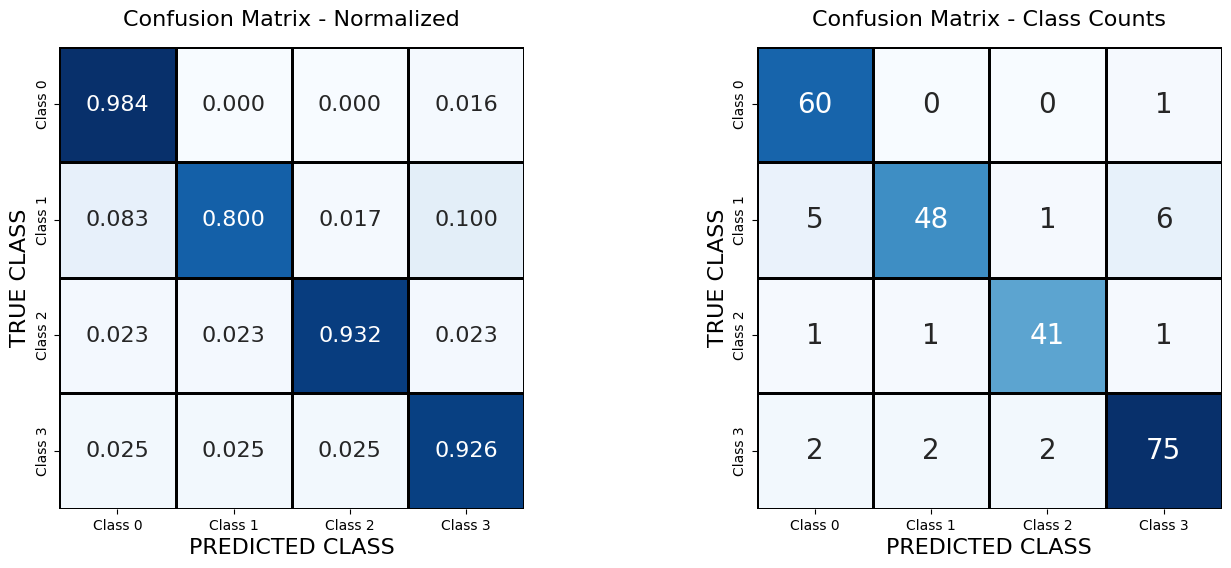

Model: gpt-4o | Noun Group: LogicalImpact


ValueError: Must pass 2-d input. shape=(6, 2, 2)

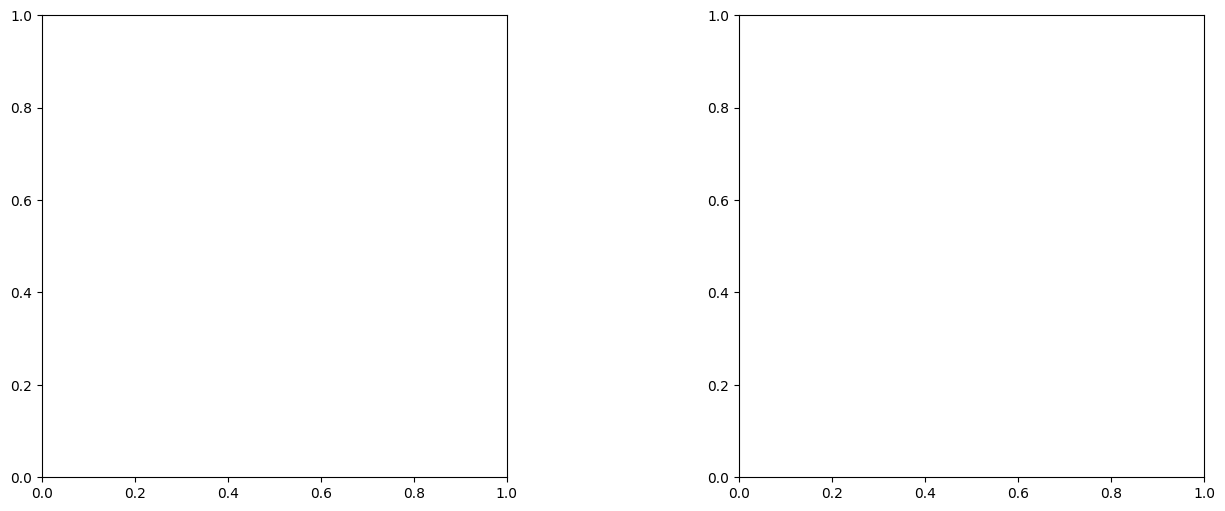

In [18]:
import os
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def extract_data_from_json(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            model_name = data.get("metadata", {}).get("model_name", "Unknown")
            noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
            f1_score_macro_avg = data.get("metadata", {}).get("metrics", {}).get("classification_report", {}).get("macro avg", {}).get("f1-score", "N/A")
            
            return model_name, noun_group, f1_score_macro_avg
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None, None

def extract_confusion_matrices(directory):
    confusion_matrices = {}
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        model_name = data.get("metadata", {}).get("model_name", "Unknown")
                        noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
                        confusion_matrix = data.get("metadata", {}).get("metrics", {}).get("confusion_matrix", "N/A")
                        
                        if model_name and noun_group:
                            confusion_matrices[(model_name, noun_group)] = confusion_matrix
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return confusion_matrices

def scan_json_files(directory):
    results = []
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                match = re.search(r'_(\d+)-shot\.json$', file)
                
                if match:
                    n_shot = match.group(1)
                    model_name, noun_group, f1_score_macro_avg = extract_data_from_json(file_path)
                    
                    if model_name and noun_group:
                        results.append((model_name, noun_group, n_shot, f1_score_macro_avg))
    
    return results

def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize=(15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap. Zeroes are
    colored white. Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white. Get more decimals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments:
    - confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix.
    - class_names: list
        List of class names in the order they index the confusion matrix.
    - figsize: tuple
        The width and height of the figure. Defaults to (15,6).
    - fontsize: int
        Font size for axes labels. Defaults to 16.
    """
    # Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace=0.5)
    
    # Show errors only by filling diagonal with zeroes
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # Normalize Confusion Matrix
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  # Fix NaNs from zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    
    sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
                linewidths=2, linecolor='black', cbar=False)
    
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # Confusion Matrix - Raw Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
                linewidths=2, linecolor='black', cbar=False)   
    
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    plt.show()

def extract_confusion_matrices(directory):
    """
    Extract confusion matrices from JSON files in a directory.
    
    Returns:
    - confusion_matrices: dict
        Dictionary where keys are (model_name, noun_group) tuples, and values are confusion matrices.
    """
    confusion_matrices = {}
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        model_name = data.get("metadata", {}).get("model_name", "Unknown")
                        noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
                        confusion_matrix_data = data.get("metadata", {}).get("metrics", {}).get("confusion_matrix", None)
                        
                        if model_name and noun_group and confusion_matrix_data:
                            confusion_matrices[(model_name, noun_group)] = np.array(confusion_matrix_data)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return confusion_matrices


# def main():
#     base_directory = "finalFolderData"  # Update this if the folder is located elsewhere
#     extracted_data = scan_json_files(base_directory)
#     confusion_matrices = extract_confusion_matrices(base_directory)
    
#     # print("Model Name | Noun Group | N-Shot | Macro Avg F1-Score")
#     # print("------------------------------------------------------")
#     # for model_name, noun_group, n_shot, f1_score_macro_avg in extracted_data:
#     #     f1_score_str = f"{f1_score_macro_avg:.4f}" if isinstance(f1_score_macro_avg, (int, float)) else "N/A"
#     #     print(f"{model_name} | {noun_group} | {n_shot}-shot | {f1_score_str}")
    
#     print("\nConfusion Matrices:")
#     for (model_name, noun_group), matrix in confusion_matrices.items():
#         print(f"{model_name} | {noun_group} | Confusion Matrix: {matrix}")

# if __name__ == "__main__":
#     main()

def main():
    base_directory = "finalFolderData"  # Update this if the folder is located elsewhere
    confusion_matrices = extract_confusion_matrices(base_directory)

    print("\nGenerating Confusion Matrix Plots:\n")
    for (model_name, noun_group), matrix in confusion_matrices.items():
        print(f"Model: {model_name} | Noun Group: {noun_group}")
        
        # Infer class names based on matrix size (assuming labels are numeric indices)
        num_classes = matrix.shape[0]
        class_names = [f"Class {i}" for i in range(num_classes)]
        
        # Plot confusion matrix
        plot_confusion_matrix(matrix, class_names)

if __name__ == "__main__":
    main()

File: AttackTheater.csv
Total Labels: 274
Unique Labels: 4
Characterization
Remote         86
Local          73
Limited Rmt    66
Physical       49
Name: count, dtype: int64
--------------------------------------------------
File: Context.csv
Total Labels: 798
Unique Labels: 7
Characterization
Application          156
Physical Hardware    129
Channel              103
Firmware             103
Guest OS             103
Host OS              102
Hypervisor           102
Name: count, dtype: int64
--------------------------------------------------
File: ImpactMethod.csv
Total Labels: 420
Unique Labels: 5
Characterization
Authentication Bypass    102
Code Execution            88
Trust Failure             86
Man-in-the-Middle         79
Context Escape            65
Name: count, dtype: int64
--------------------------------------------------
File: LogicalImpact.csv
Total Labels: 562
Unique Labels: 6
Characterization
Write                   134
Read                    116
Resource Removal        

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\1960004878.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=analysis_results['Combined']['label_counts'].index,


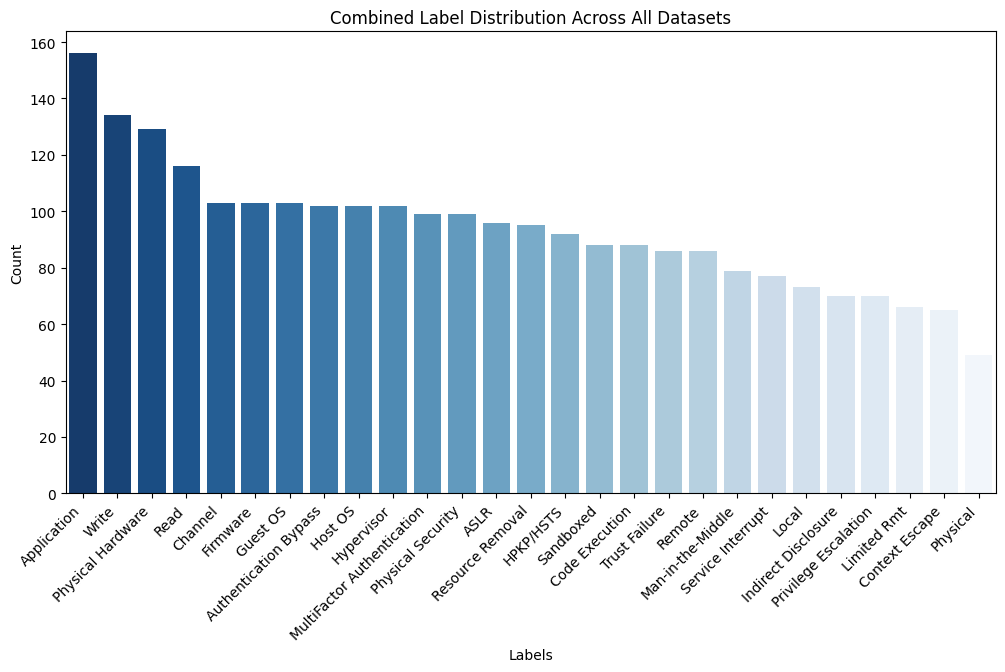

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    combined_labels = []
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
            combined_labels.extend(df['Characterization'].tolist())
    
    # Create combined distribution
    combined_series = pd.Series(combined_labels).value_counts()
    analysis_results['Combined'] = {
        'unique_labels': combined_series.index.tolist(),
        'label_counts': combined_series,
        'total_labels': len(combined_labels)
    }
    
    return analysis_results

# Function to plot the label distribution using different visualization styles
def plot_label_distribution(analysis_results):
    for name, result in analysis_results.items():
        plt.figure(figsize=(12, 6))
        colors = sns.color_palette("husl", len(result['label_counts']))
        
        # Bar plot
        sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.title(f'Label Distribution for {name}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        # Pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(result['label_counts'], labels=result['label_counts'].index, autopct='%1.1f%%', colors=colors, startangle=140)
        plt.title(f'Label Distribution Pie Chart for {name}')
        plt.show()
        
        # Horizontal bar plot for better readability
        plt.figure(figsize=(12, 6))
        sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)
        plt.xlabel('Count')
        plt.ylabel('Labels')
        plt.title(f'Horizontal Label Distribution for {name}')
        plt.show()

# Function to plot the combined label distribution
def plot_combined_label_distribution(analysis_results):
    if 'Combined' in analysis_results:
        plt.figure(figsize=(12, 6))
        colors = sns.color_palette("Blues_r", len(analysis_results['Combined']['label_counts']))
        
        sns.barplot(x=analysis_results['Combined']['label_counts'].index, 
                    y=analysis_results['Combined']['label_counts'].values, 
                    palette=colors)
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.title('Combined Label Distribution Across All Datasets')
        plt.xticks(rotation=45, ha='right')
        plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis results
for file, result in analysis_results.items():
    print(f"File: {file}")
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)

# Plot distributions
# plot_label_distribution(analysis_results)

# Plot combined distribution
plot_combined_label_distribution(analysis_results)


File: AttackTheater.csv
Total Labels: 274
Unique Labels: 4
Characterization
Remote         86
Local          73
Limited Rmt    66
Physical       49
Name: count, dtype: int64
--------------------------------------------------
File: Context.csv
Total Labels: 798
Unique Labels: 7
Characterization
Application          156
Physical Hardware    129
Channel              103
Firmware             103
Guest OS             103
Host OS              102
Hypervisor           102
Name: count, dtype: int64
--------------------------------------------------
File: ImpactMethod.csv
Total Labels: 420
Unique Labels: 5
Characterization
Authentication Bypass    102
Code Execution            88
Trust Failure             86
Man-in-the-Middle         79
Context Escape            65
Name: count, dtype: int64
--------------------------------------------------
File: LogicalImpact.csv
Total Labels: 562
Unique Labels: 6
Characterization
Write                   134
Read                    116
Resource Removal        

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)


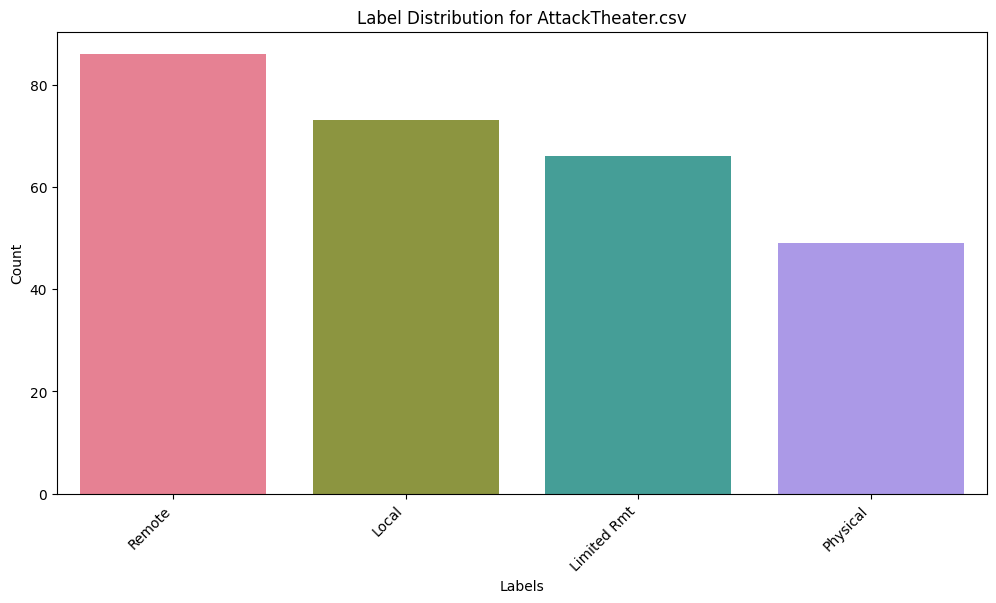

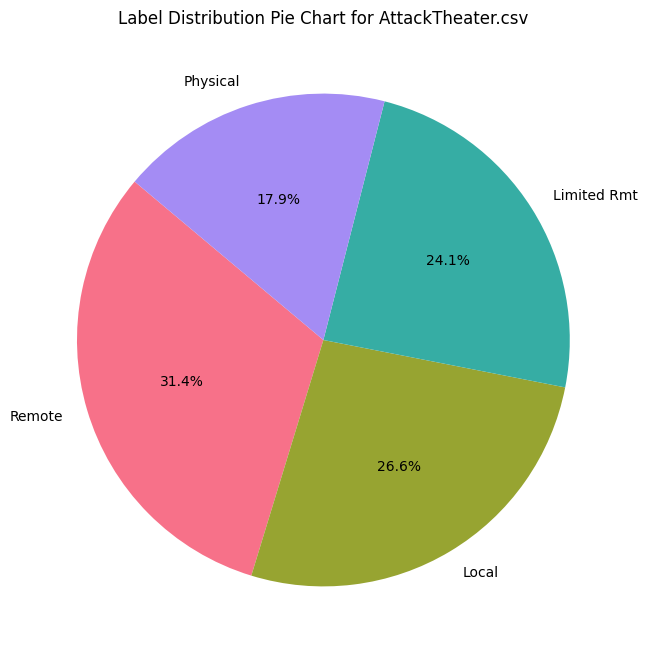

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)


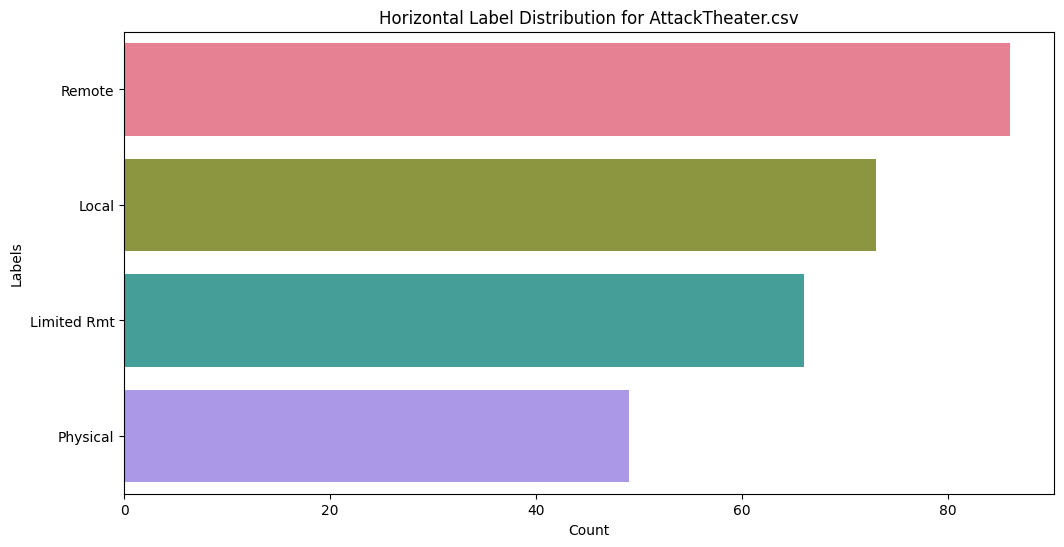

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)


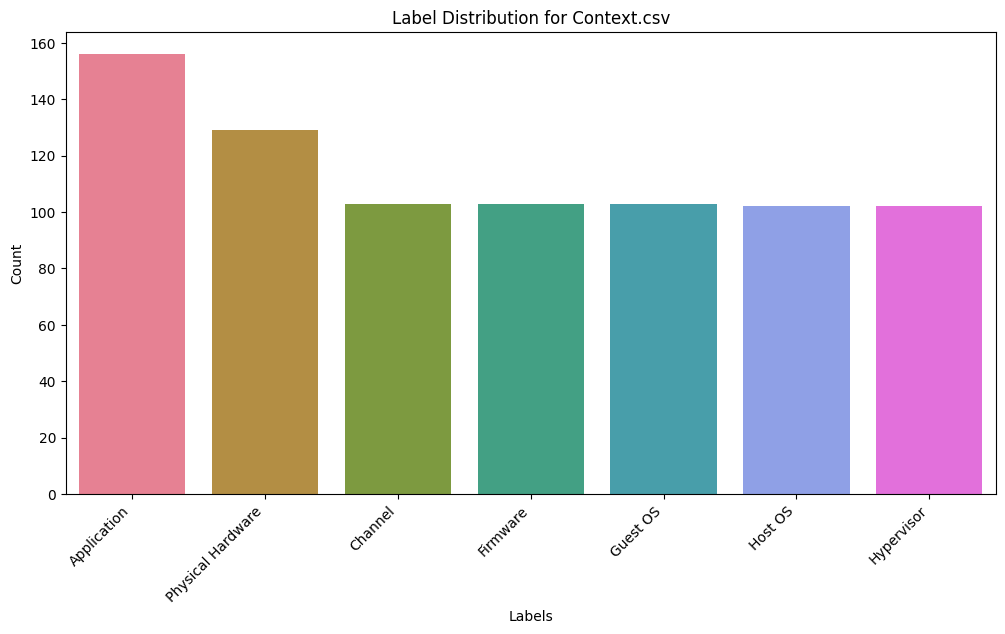

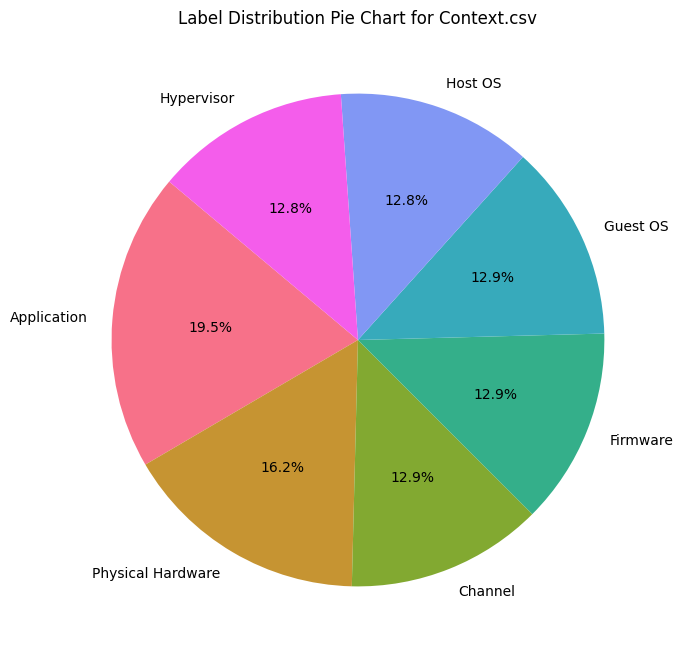

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)


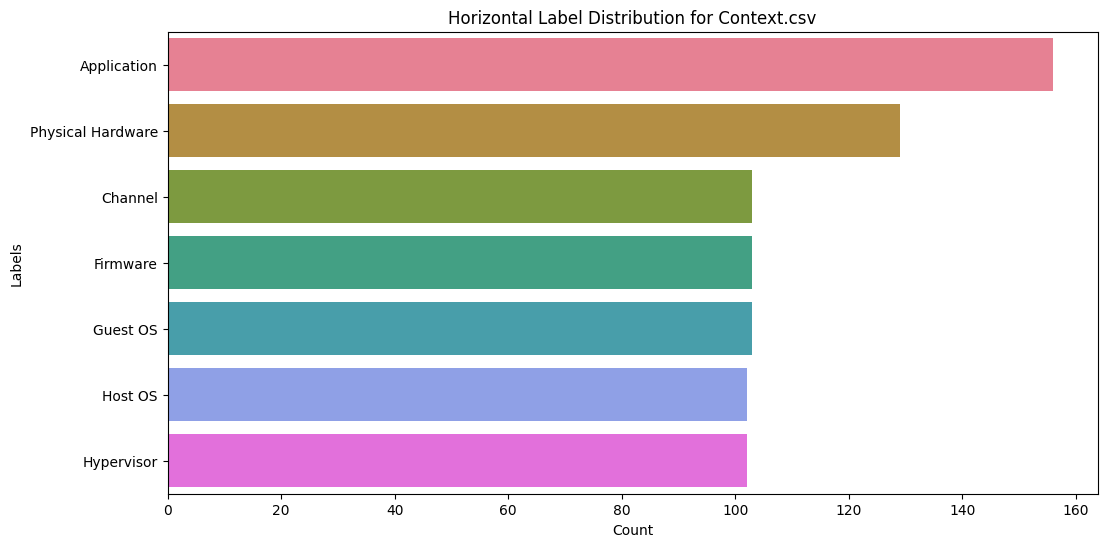

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)


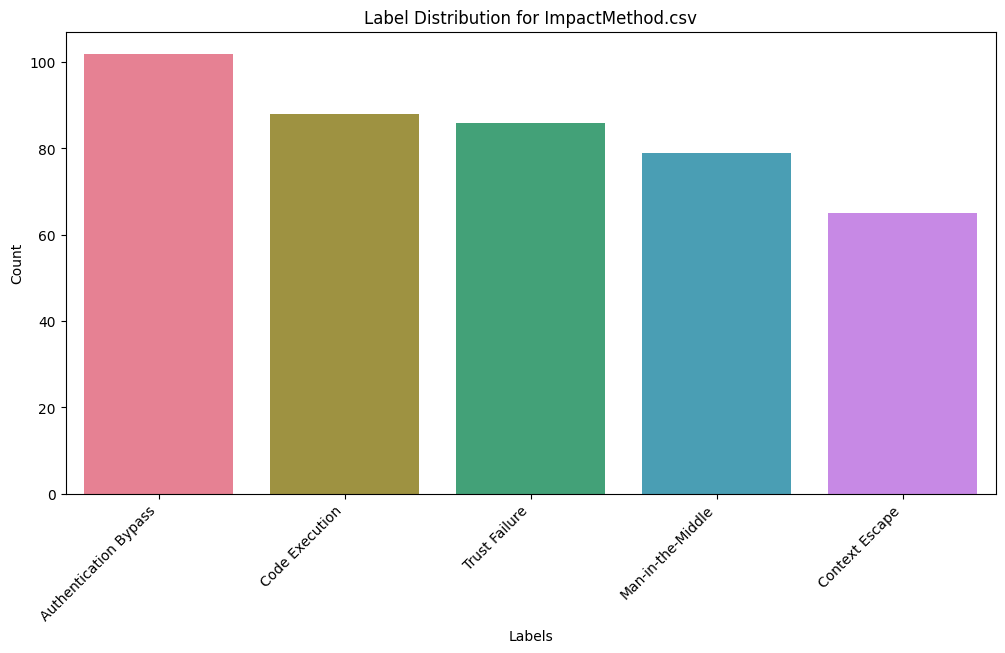

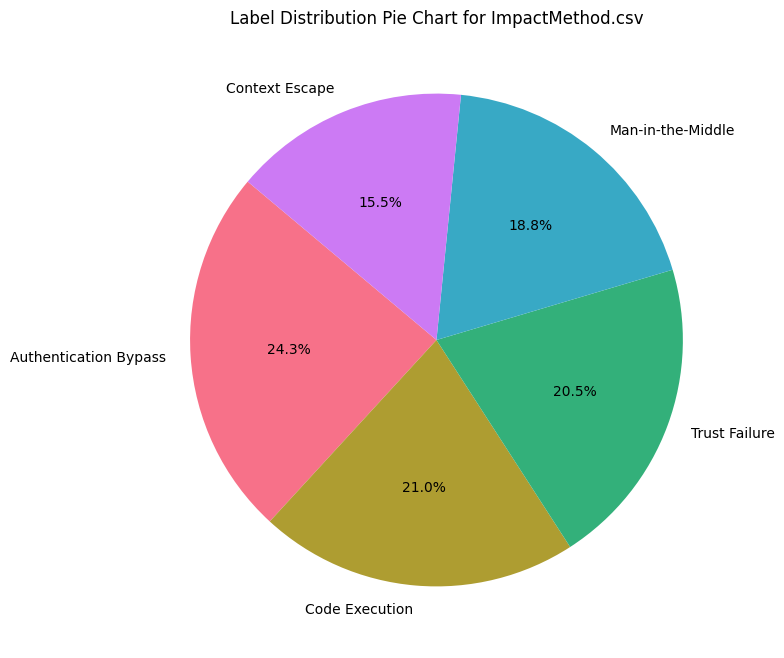

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)


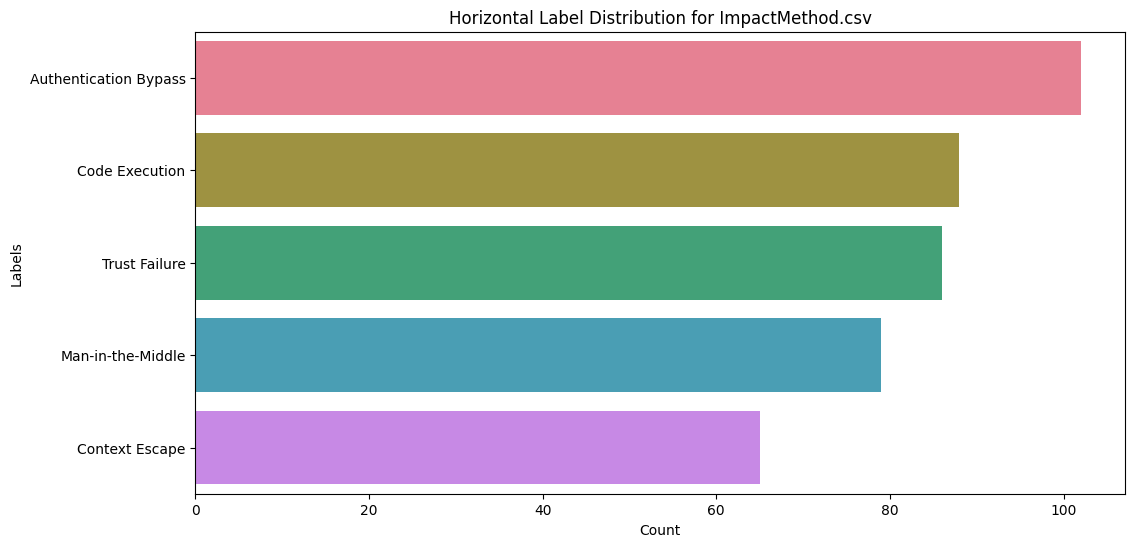

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)


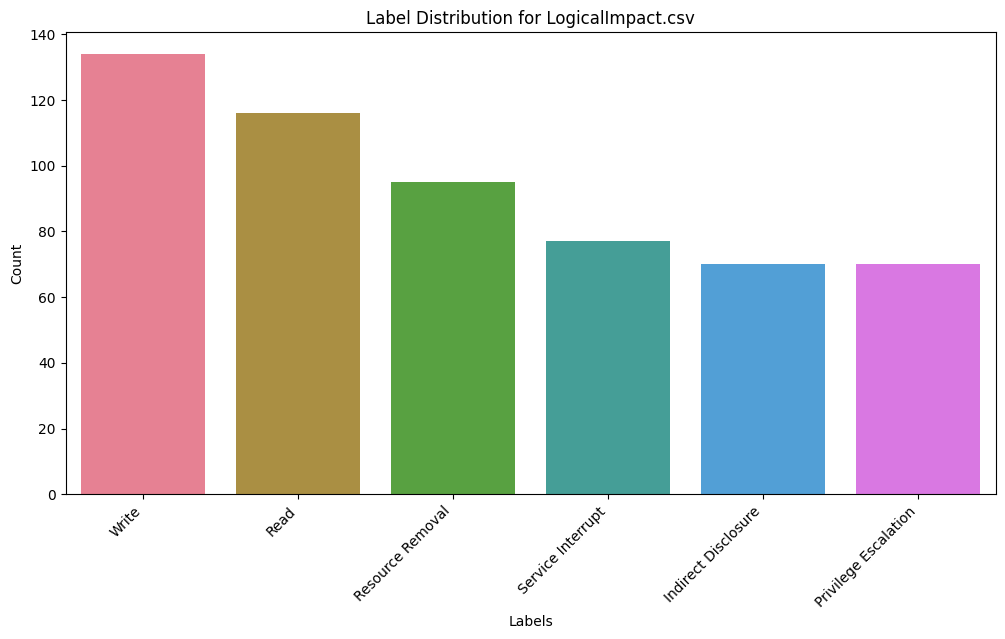

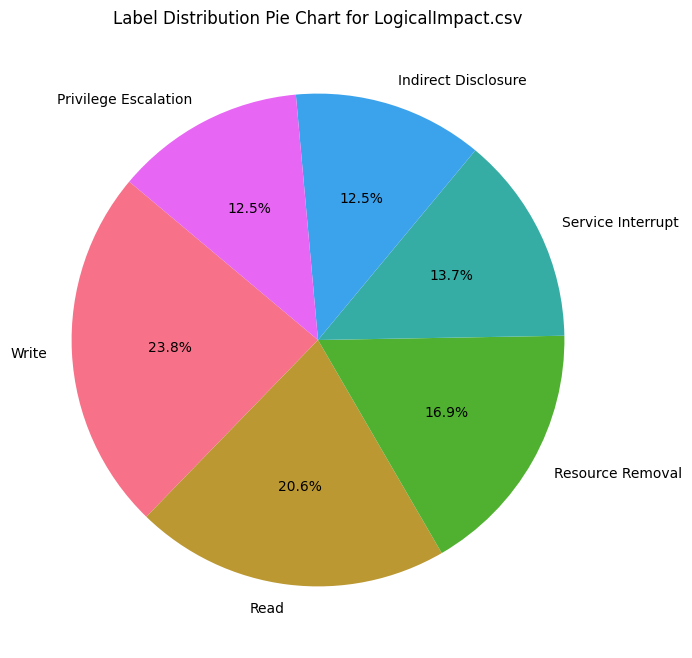

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)


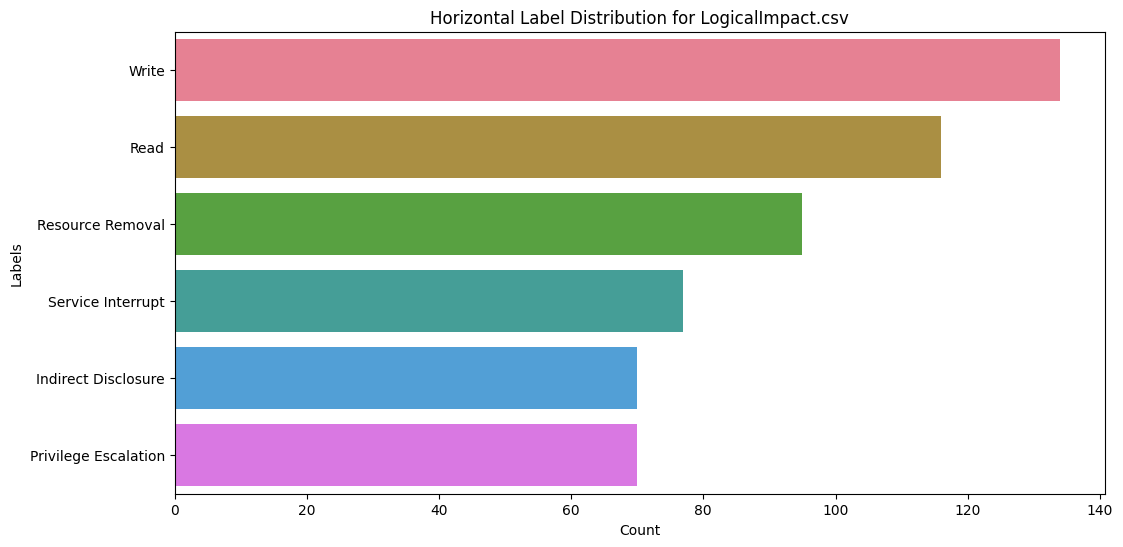

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)


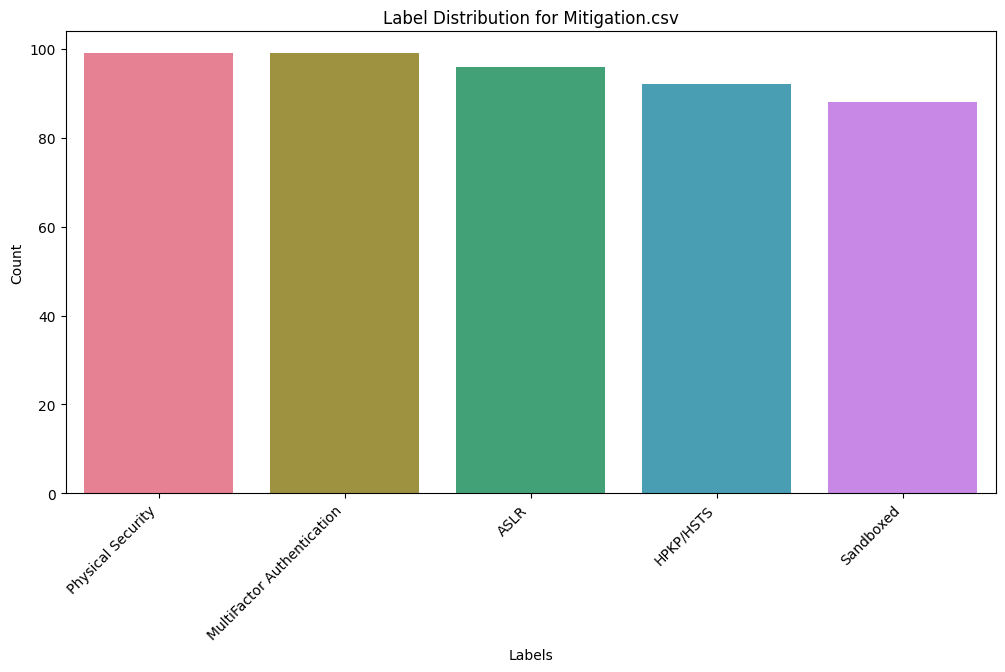

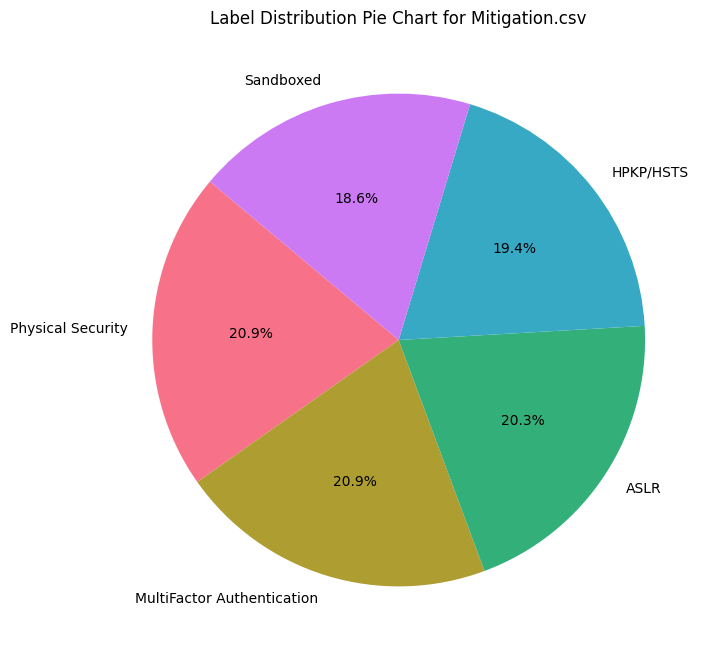

C:\Users\elija\AppData\Local\Temp\ipykernel_131152\2764461105.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)


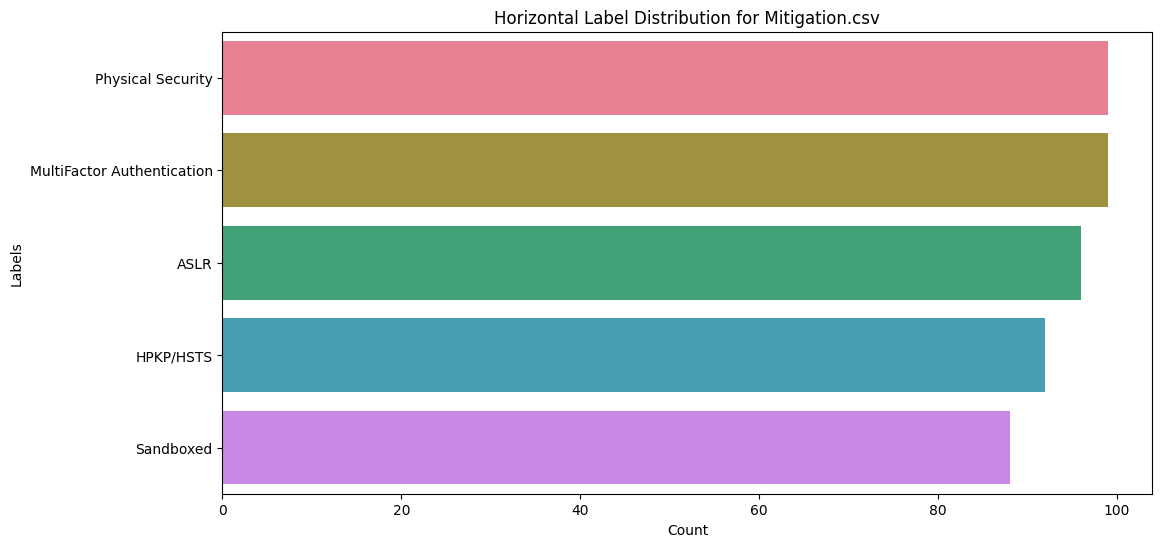

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
    return analysis_results

# Function to plot the label distribution using different visualization styles
def plot_label_distribution(analysis_results):
    for name, result in analysis_results.items():
        plt.figure(figsize=(12, 6))
        colors = sns.color_palette("husl", len(result['label_counts']))
        
        # Bar plot
        sns.barplot(x=result['label_counts'].index, y=result['label_counts'].values, palette=colors)
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.title(f'Label Distribution for {name}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
        # Pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(result['label_counts'], labels=result['label_counts'].index, autopct='%1.1f%%', colors=colors, startangle=140)
        plt.title(f'Label Distribution Pie Chart for {name}')
        plt.show()
        
        # Horizontal bar plot for better readability
        plt.figure(figsize=(12, 6))
        sns.barplot(y=result['label_counts'].index, x=result['label_counts'].values, palette=colors)
        plt.xlabel('Count')
        plt.ylabel('Labels')
        plt.title(f'Horizontal Label Distribution for {name}')
        plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis results
for file, result in analysis_results.items():
    print(f"File: {file}")
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)

# Plot distributions
plot_label_distribution(analysis_results)


File: AttackTheater.csv
Total Labels: 274
Unique Labels: 4
Characterization
Remote         86
Local          73
Limited Rmt    66
Physical       49
Name: count, dtype: int64
--------------------------------------------------
File: Context.csv
Total Labels: 798
Unique Labels: 7
Characterization
Application          156
Physical Hardware    129
Channel              103
Firmware             103
Guest OS             103
Host OS              102
Hypervisor           102
Name: count, dtype: int64
--------------------------------------------------
File: ImpactMethod.csv
Total Labels: 420
Unique Labels: 5
Characterization
Authentication Bypass    102
Code Execution            88
Trust Failure             86
Man-in-the-Middle         79
Context Escape            65
Name: count, dtype: int64
--------------------------------------------------
File: LogicalImpact.csv
Total Labels: 562
Unique Labels: 6
Characterization
Write                   134
Read                    116
Resource Removal        

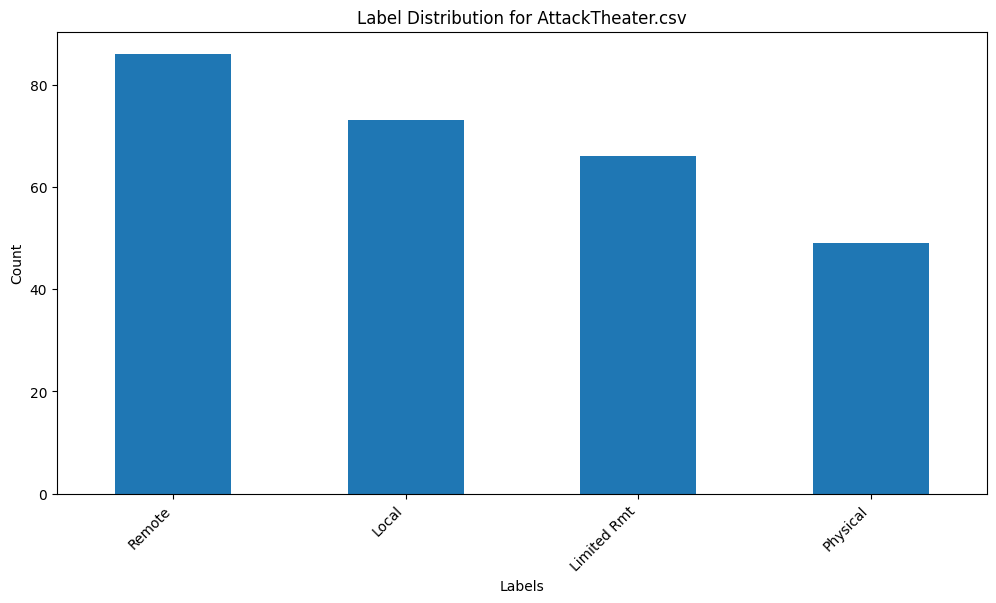

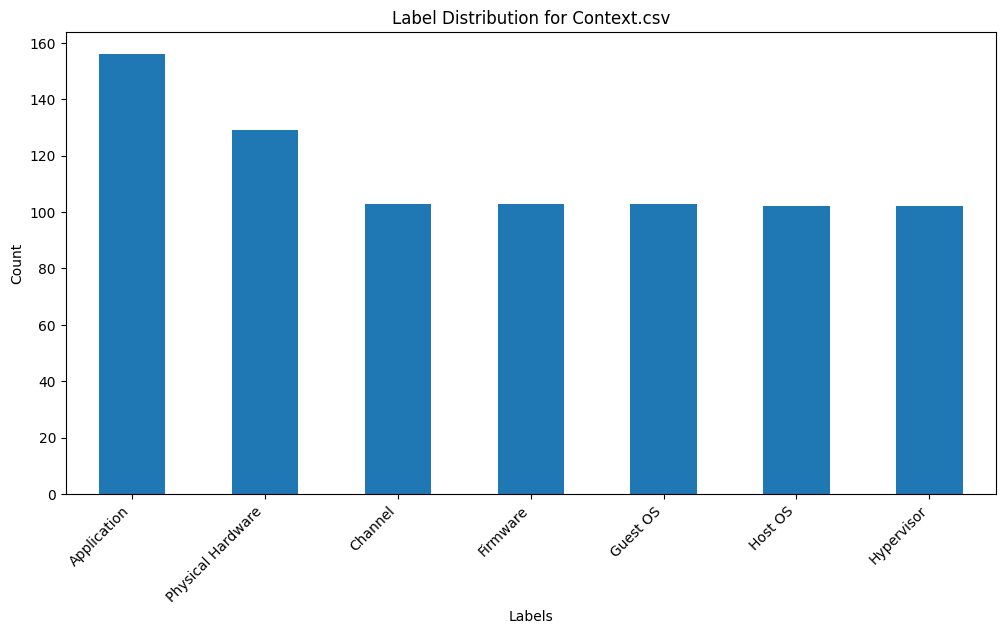

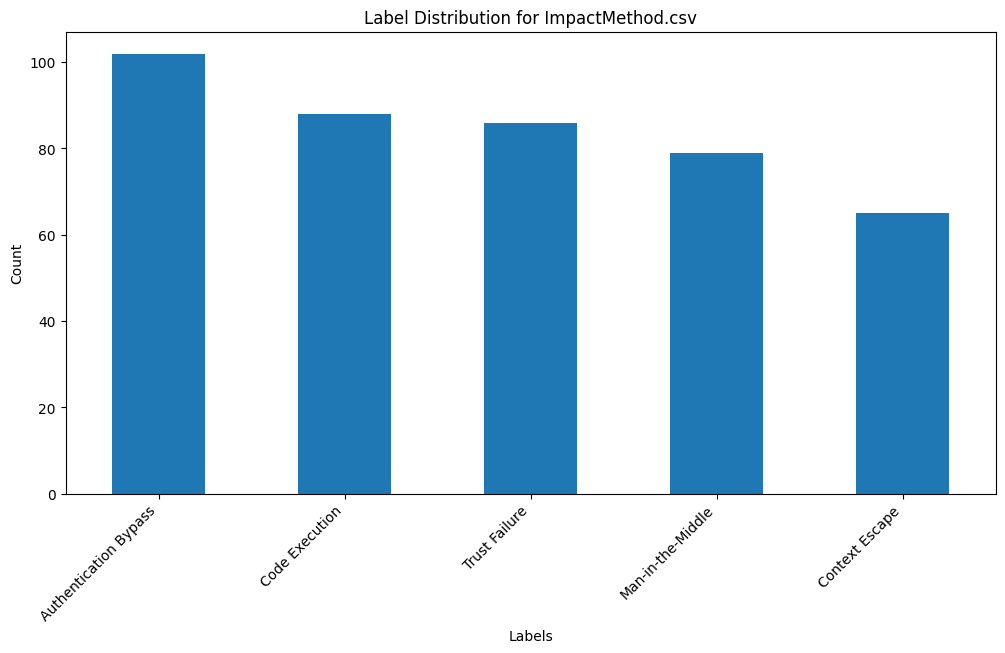

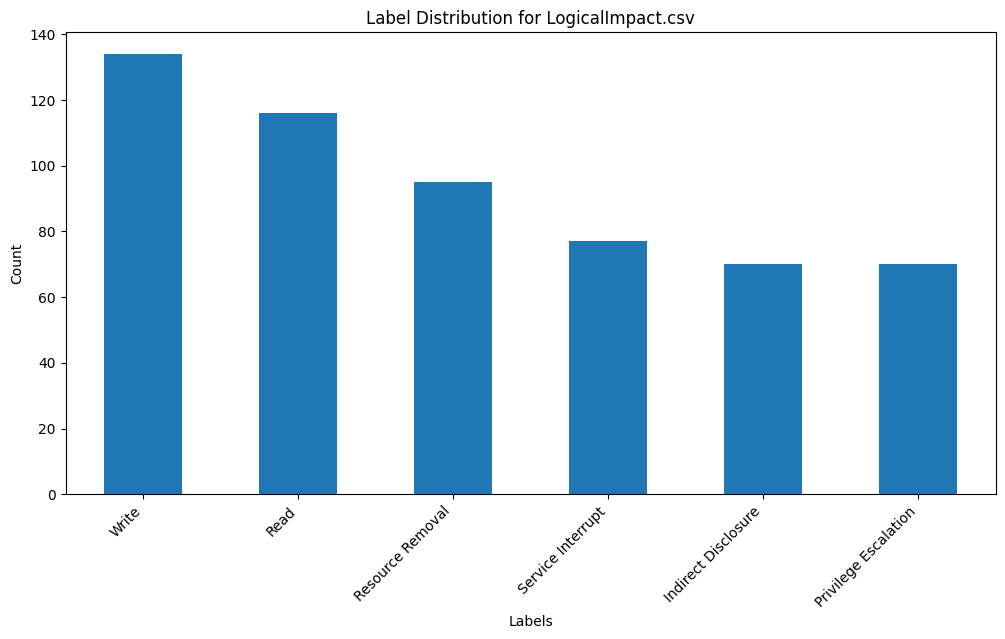

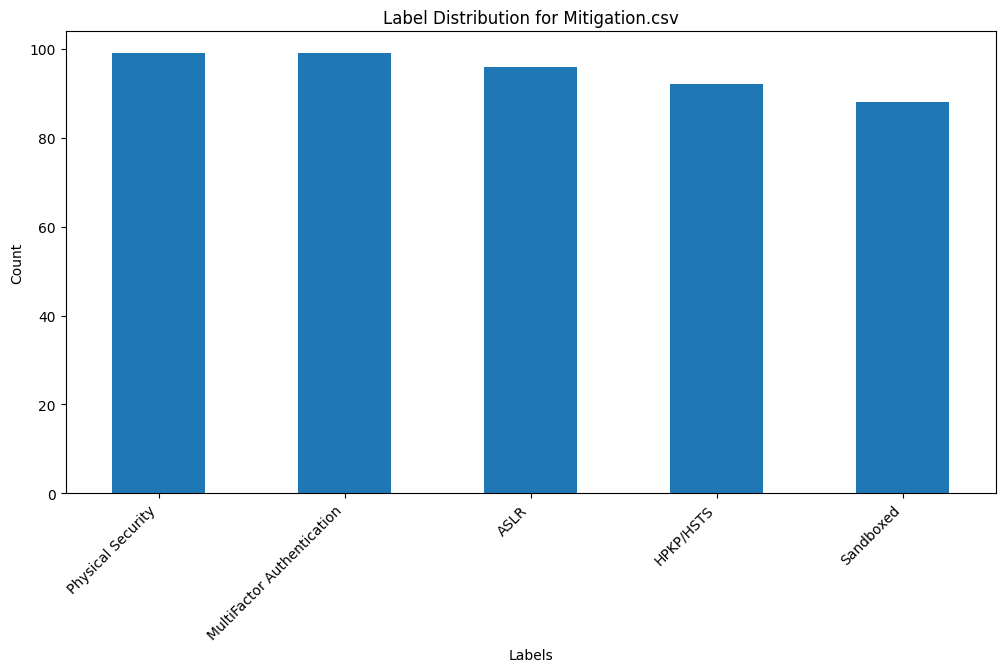

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define directory and file names
directory = "nounGroups"
file_names = ["AttackTheater.csv", "Context.csv", "ImpactMethod.csv", "LogicalImpact.csv", "Mitigation.csv"]

# Function to load CSVs into DataFrames
def load_csv_files(directory, file_names):
    dataframes = {}
    for file in file_names:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes[file] = df
    return dataframes

# Function to analyze 'Characterization' column
def analyze_labels(dataframes):
    analysis_results = {}
    for name, df in dataframes.items():
        if 'Characterization' in df.columns:
            label_counts = df['Characterization'].value_counts()
            total_labels = len(df['Characterization'])
            unique_labels = label_counts.index.tolist()
            analysis_results[name] = {
                'unique_labels': unique_labels,
                'label_counts': label_counts,
                'total_labels': total_labels
            }
    return analysis_results

# Function to plot the label distribution
def plot_label_distribution(analysis_results):
    for name, result in analysis_results.items():
        plt.figure(figsize=(12, 6))
        result['label_counts'].plot(kind='bar')
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.title(f'Label Distribution for {name}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

# Load the CSV files
dataframes = load_csv_files(directory, file_names)

# Analyze labels
analysis_results = analyze_labels(dataframes)

# Display label analysis results
for file, result in analysis_results.items():
    print(f"File: {file}")
    print(f"Total Labels: {result['total_labels']}")
    print(f"Unique Labels: {len(result['unique_labels'])}")
    print(result['label_counts'])
    print("-" * 50)

# Plot distributions
plot_label_distribution(analysis_results)


C:\Users\elija\AppData\Local\Temp\ipykernel_131496\2056913068.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


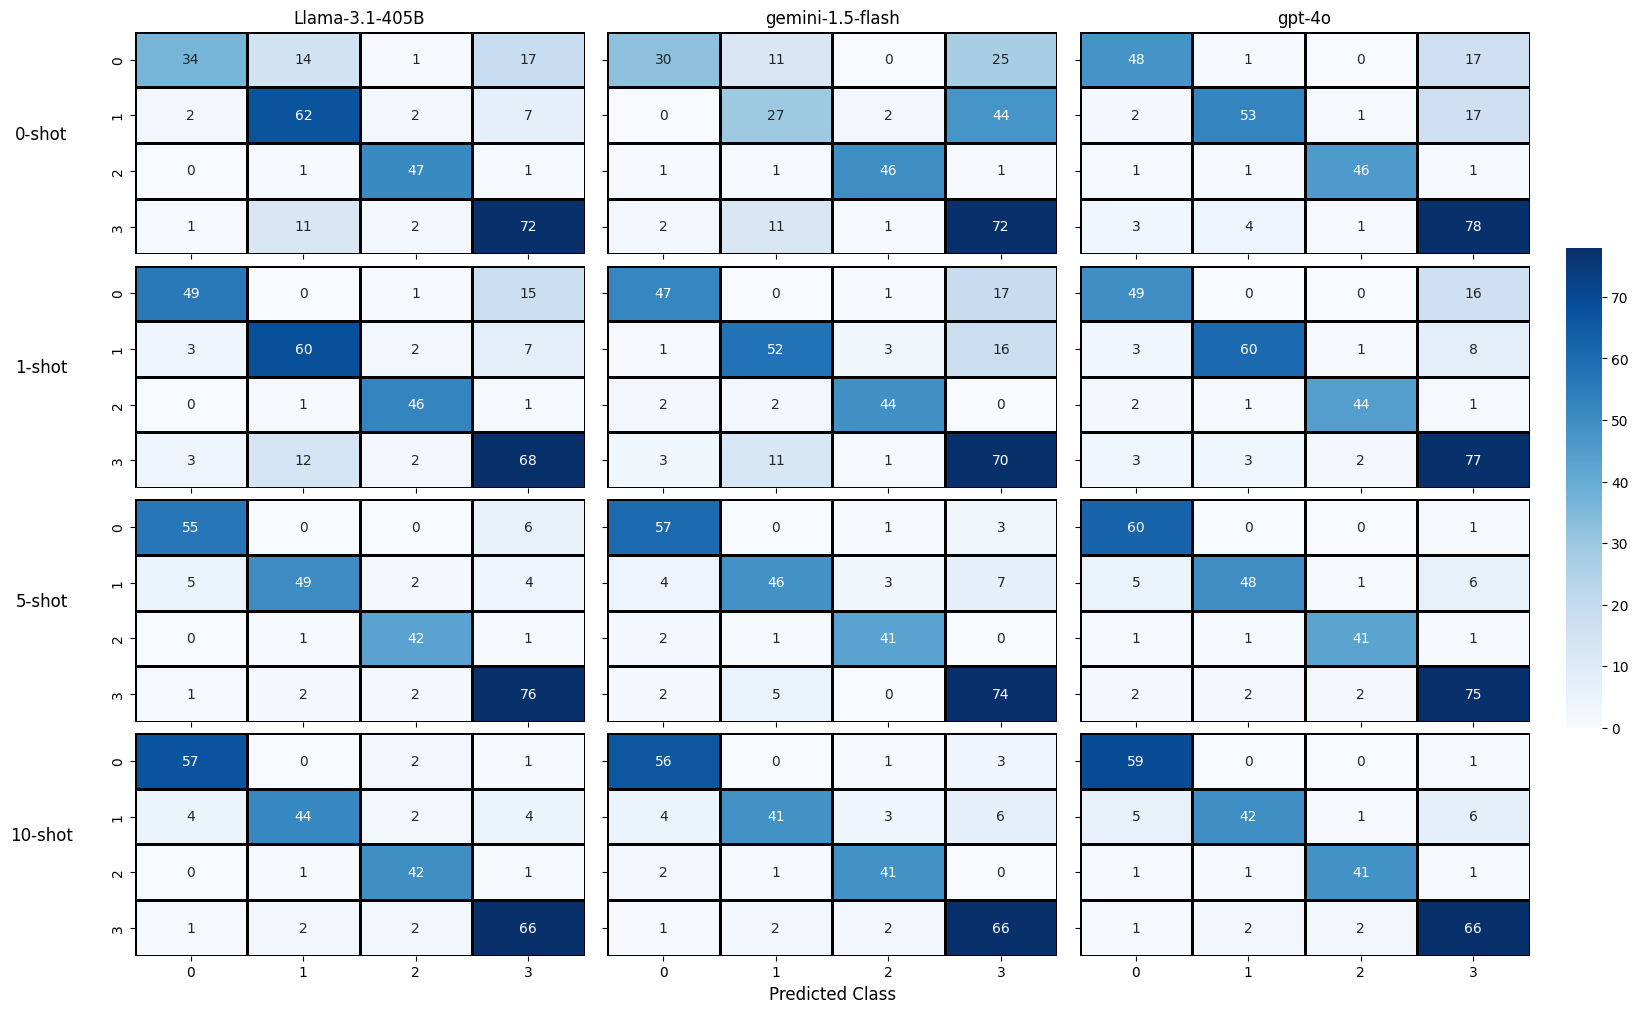

In [22]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the directory structure
correct_base_dir = "c:\\Users\\elija\\OneDrive\\Desktop\\Fall 2024\\Research\\llmCharacterizationTest\\stuffThatWorks\\confusionMatrixData"
base_dir = os.path.abspath(os.path.join(correct_base_dir, "5-shot_shot"))
models = ["gemini-1.5-flash", "gpt-4o", "meta"]

# Debugging: Print base directory
print(f"Looking for files in: {base_dir}")
print(f"Contents of parent directory: {os.listdir(correct_base_dir)}")

if not os.path.isdir(base_dir):
    print(f"Error: Base directory not found - {base_dir}")
    exit()

# Step 1: Extract unique labels from all JSON files
labels_set = set()
model_conf_matrices = {}

for model in models:
    model_dir = os.path.abspath(os.path.join(base_dir, model))
    model_conf_matrices[model] = {}
    
    print(f"Checking directory: {model_dir}")
    if not os.path.isdir(model_dir):
        print(f"Warning: Directory not found - {model_dir}")
        continue
    
    files = os.listdir(model_dir)
    print(f"Files in {model}: {files}")
    
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(model_dir, file)
            try:
                with open(file_path, "r") as f:
                    data = json.load(f)
                    print(f"Keys in {file}: {data.keys()}")
                    
                    if "metadata" in data:
                        # Extract classification labels from the report
                        if "classification_report" in data["metadata"]:
                            labels = list(data["metadata"]["classification_report"].keys())
                            labels_set.update(labels)
                            
                        # Extract the confusion matrix
                        if "metrics" in data["metadata"] and "confusion_matrix" in data["metadata"]["metrics"]:
                            matrix = np.array(data["metadata"]["metrics"]["confusion_matrix"])
                            print(f"Matrix shape in {file}: {matrix.shape}")
                            if matrix.size > 0:
                                model_conf_matrices[model][file] = matrix
                            else:
                                print(f"Warning: Empty confusion matrix in {file_path}")
                    else:
                        print(f"Warning: 'metadata' key not found in {file_path}")
            except FileNotFoundError:
                print(f"Error: File not found - {file_path}")
                continue

# Sort labels to ensure consistency
labels_list = sorted(labels_set)
num_labels = len(labels_list)

# Step 2: Ensure consistency in confusion matrix dimensions
for model in model_conf_matrices:
    for file in model_conf_matrices[model]:
        matrix = model_conf_matrices[model][file]
        
        # If it's multilabel, sum across multiple axes
        if len(matrix.shape) > 2:
            matrix = np.sum(matrix, axis=0)
        
        # Resize to match the expected shape
        if matrix.shape != (num_labels, num_labels):
            padded_matrix = np.zeros((num_labels, num_labels))
            min_dim = min(matrix.shape[0], num_labels)
            padded_matrix[:min_dim, :min_dim] = matrix[:min_dim, :min_dim]
            model_conf_matrices[model][file] = padded_matrix
        else:
            model_conf_matrices[model][file] = matrix

# Step 3: Aggregate confusion matrices for each model
final_conf_matrices = {}
for model in models:
    total_matrix = np.zeros((num_labels, num_labels))
    for matrix in model_conf_matrices.get(model, {}).values():
        total_matrix += matrix
    final_conf_matrices[model] = total_matrix

# Ensure at least one non-empty matrix exists before plotting
if all(matrix.size == 0 for matrix in final_conf_matrices.values()):
    print("Error: All confusion matrices are empty. Cannot generate heatmap.")
else:
    # Step 4: Plot the final confusion matrix
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(
        np.hstack([final_conf_matrices.get(model, np.zeros((num_labels, num_labels))) for model in models if final_conf_matrices[model].size > 0]), 
        annot=False, cmap="Blues", fmt=".0f", cbar=True,
        xticklabels=sum([[model] * num_labels for model in models if final_conf_matrices[model].size > 0], []),
        yticklabels=labels_list
    )
    plt.xlabel("Models")
    plt.ylabel("Labels")
    plt.title("Aggregated Confusion Matrix Across Models")
    plt.xticks(rotation=45)
    plt.show()


In [8]:
import os
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def extract_data_from_json(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            model_name = data.get("metadata", {}).get("model_name", "Unknown")
            noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
            f1_score_macro_avg = data.get("metadata", {}).get("metrics", {}).get("classification_report", {}).get("macro avg", {}).get("f1-score", "N/A")
            
            return model_name, noun_group, f1_score_macro_avg
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None, None

def extract_confusion_matrices(directory):
    confusion_matrices = {}
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        model_name = data.get("metadata", {}).get("model_name", "Unknown")
                        noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
                        confusion_matrix = data.get("metadata", {}).get("metrics", {}).get("confusion_matrix", "N/A")
                        
                        if model_name and noun_group:
                            confusion_matrices[(model_name, noun_group)] = confusion_matrix
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return confusion_matrices

def scan_json_files(directory):
    results = []
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                match = re.search(r'_(\d+)-shot\.json$', file)
                
                if match:
                    n_shot = match.group(1)
                    model_name, noun_group, f1_score_macro_avg = extract_data_from_json(file_path)
                    
                    if model_name and noun_group:
                        results.append((model_name, noun_group, n_shot, f1_score_macro_avg))
    
    return results

def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize=(15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap. Zeroes are
    colored white. Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white. Get more decimals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments:
    - confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix.
    - class_names: list
        List of class names in the order they index the confusion matrix.
    - figsize: tuple
        The width and height of the figure. Defaults to (15,6).
    - fontsize: int
        Font size for axes labels. Defaults to 16.
    """
    # Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace=0.5)
    
    # Show errors only by filling diagonal with zeroes
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # Normalize Confusion Matrix
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  # Fix NaNs from zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    
    sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
                linewidths=2, linecolor='black', cbar=False)
    
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # Confusion Matrix - Raw Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
                linewidths=2, linecolor='black', cbar=False)   
    
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    plt.show()

def extract_confusion_matrices(directory):
    """
    Extract confusion matrices from JSON files in a directory.
    
    Returns:
    - confusion_matrices: dict
        Dictionary where keys are (model_name, noun_group) tuples, and values are confusion matrices.
    """
    confusion_matrices = {}
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        model_name = data.get("metadata", {}).get("model_name", "Unknown")
                        noun_group = data.get("metadata", {}).get("noun_group", "Unknown")
                        confusion_matrix_data = data.get("metadata", {}).get("metrics", {}).get("confusion_matrix", None)
                        
                        if model_name and noun_group and confusion_matrix_data:
                            confusion_matrices[(model_name, noun_group)] = np.array(confusion_matrix_data)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return confusion_matrices


def main():
    base_directory = "finalFolderData"  # Update this if the folder is located elsewhere
    extracted_data = scan_json_files(base_directory)
    confusion_matrices = extract_confusion_matrices(base_directory)
    
    print("Model Name | Noun Group | N-Shot | Macro Avg F1-Score")
    print("------------------------------------------------------")
    for model_name, noun_group, n_shot, f1_score_macro_avg in extracted_data:
        f1_score_str = f"{f1_score_macro_avg:.4f}" if isinstance(f1_score_macro_avg, (int, float)) else "N/A"
        print(f"{model_name} | {noun_group} | {n_shot}-shot | {f1_score_str}")
    
    print("\nConfusion Matrices:")
    for (model_name, noun_group), matrix in confusion_matrices.items():
        print(f"{model_name} | {noun_group} | Confusion Matrix: {matrix}")

if __name__ == "__main__":
    main()

# def main():
#     base_directory = "finalFolderData"  # Update this if the folder is located elsewhere
#     confusion_matrices = extract_confusion_matrices(base_directory)

#     print("\nGenerating Confusion Matrix Plots:\n")
#     for (model_name, noun_group), matrix in confusion_matrices.items():
#         print(f"Model: {model_name} | Noun Group: {noun_group}")
        
#         # Infer class names based on matrix size (assuming labels are numeric indices)
#         num_classes = matrix.shape[0]
#         class_names = [f"Class {i}" for i in range(num_classes)]
        
#         # Plot confusion matrix
#         plot_confusion_matrix(matrix, class_names)

# if __name__ == "__main__":
#     main()

Model Name | Noun Group | N-Shot | Macro Avg F1-Score
------------------------------------------------------
gpt-4o | Mitigation | 10-shot | 0.8117
gemini-1.5-flash | AttackTheater | 0-shot | 0.6539
gemini-1.5-flash | Context | 0-shot | 0.6819
gemini-1.5-flash | ImpactMethod | 0-shot | 0.7610
gemini-1.5-flash | LogicalImpact | 0-shot | 0.6559
gemini-1.5-flash | Mitigation | 0-shot | 0.5391
gpt-4o | Context | 0-shot | 0.7291
gpt-4o | ImpactMethod | 0-shot | 0.8390
gpt-4o | AttackTheater | 0-shot | 0.8339
gpt-4o | LogicalImpact | 0-shot | 0.7142
gpt-4o | Mitigation | 0-shot | 0.7883
meta | AttackTheater | 0-shot | 0.7870
meta | ImpactMethod | 0-shot | 0.6885
meta | Context | 0-shot | 0.5670
meta | LogicalImpact | 0-shot | 0.6806
meta | Mitigation | 0-shot | 0.7480
gemini-1.5-flash | AttackTheater | 1-shot | 0.8019
gemini-1.5-flash | Context | 1-shot | 0.7179
gemini-1.5-flash | ImpactMethod | 1-shot | 0.8307
gemini-1.5-flash | LogicalImpact | 1-shot | 0.8010
gemini-1.5-flash | Mitigation 

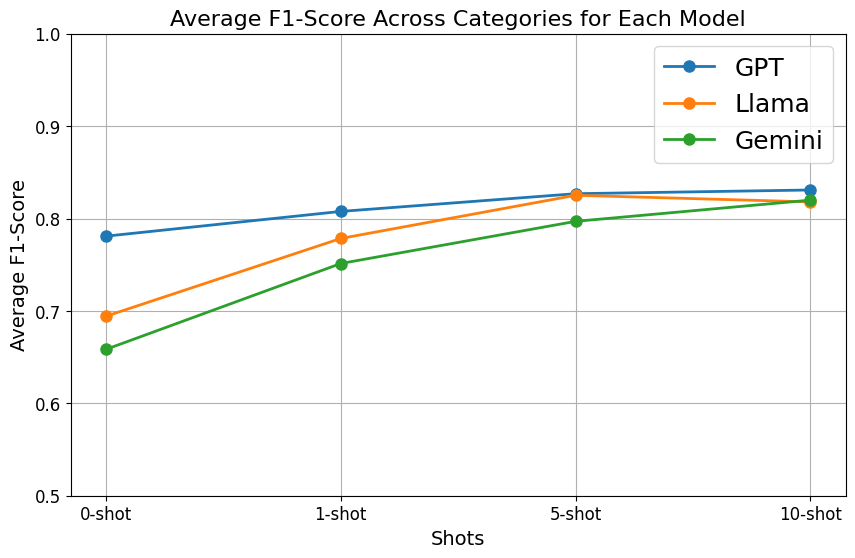

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and categories
models = ["GPT", "Llama", "Gemini"]
shots = ["0-shot", "1-shot", "5-shot", "10-shot"]
categories = ["Context", "ImpactMethod", "AttackTheater", "LogicalImpact", "Mitigation"]

# Data for GPT, Llama, and Gemini
data = {
    "GPT": [
        [0.7291, 0.8390, 0.8339, 0.7142, 0.7883],
        [0.7992, 0.8628, 0.8589, 0.7235, 0.7940],
        [0.8015, 0.8863, 0.9104, 0.7573, 0.7788],
        [0.8001, 0.9057, 0.9068, 0.7301, 0.8117],
    ],
    "Llama": [
        [0.5670, 0.6885, 0.7870, 0.6806, 0.7480],
        [0.6444, 0.8472, 0.8366, 0.7638, 0.8000],
        [0.7073, 0.8930, 0.9037, 0.7912, 0.8305],
        [0.7171, 0.8898, 0.9105, 0.7345, 0.8380],
    ],
    "Gemini": [
        [0.6819, 0.7610, 0.6539, 0.6559, 0.5391],
        [0.7179, 0.8307, 0.8019, 0.8010, 0.6050],
        [0.7298, 0.8386, 0.8861, 0.8266, 0.7036],
        [0.7464, 0.8693, 0.8881, 0.8313, 0.7645],
    ],
}

# Compute average F1 scores across categories for each model and shot
average_f1_scores = {model: [np.mean(scores) for scores in data[model]] for model in models}

# Plot average F1-score vs. shots for each model
plt.figure(figsize=(10, 6))
for model in models:
    plt.plot(shots, average_f1_scores[model], marker='o', label=model, linewidth=2, markersize=8)

# Increase font size for labels, title, and legend
plt.title("Average F1-Score Across Categories for Each Model", fontsize=16)
plt.xlabel("Shots", fontsize=14)
plt.ylabel("Average F1-Score", fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted y-axis for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=18)
plt.grid(True)

# Show the plot
plt.show()
